<a href="https://colab.research.google.com/github/PPosadaQ/Analitica-de-Negocios---EAFIT/blob/main/Reto_3_M%C3%A9todos_de_Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Préstamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se cargan los archivos - Análisis a priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlación:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


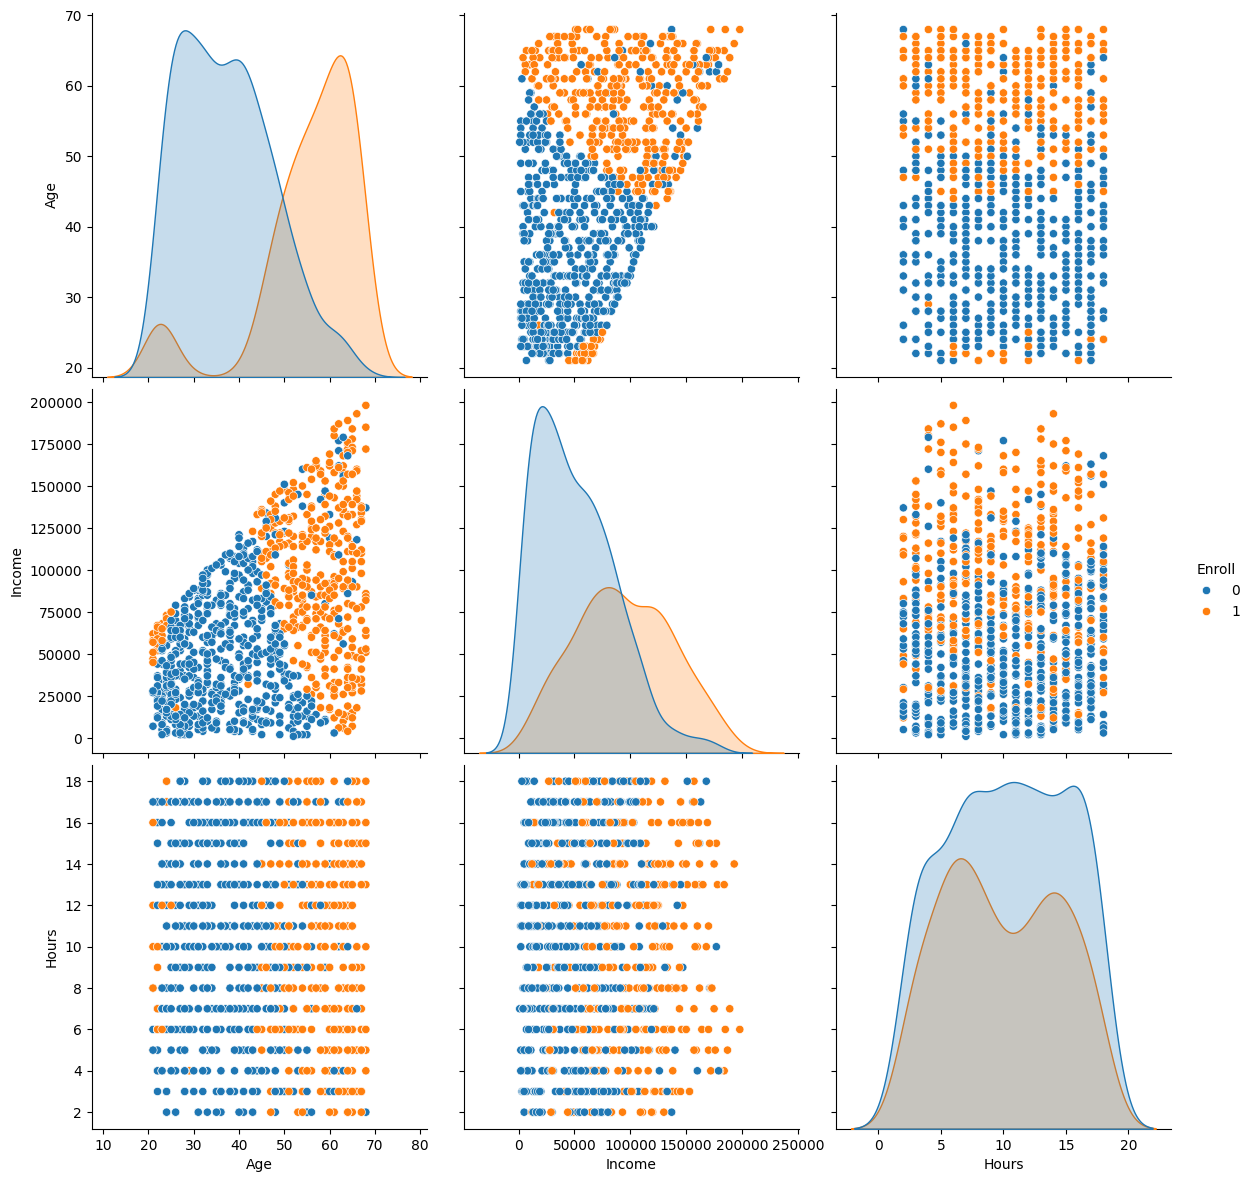

In [ ]:
nxl='/content/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100) #mostrar las primeras 100 filas

XDB=XDB[['Age','Income', 'Hours', 'Enroll']]

sns.pairplot(XDB, hue='Enroll', size=4,vars=['Age','Income','Hours'])

#Para conirmar la buena correlación
corr=XDB.corr()
print("Esta es la matriz de correlación:\n",corr)

#Se procede con la configarción de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:3]) #Toma las variables de entrada son Age, Income y Hours
YD=np.array(XDB.iloc[:,3]) #La variable de salida es Enroll

2. Implementamos el modeo KNN

Esta es la matriz de confusión:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
La decisión frente al pronóstico de membresía es: [0]


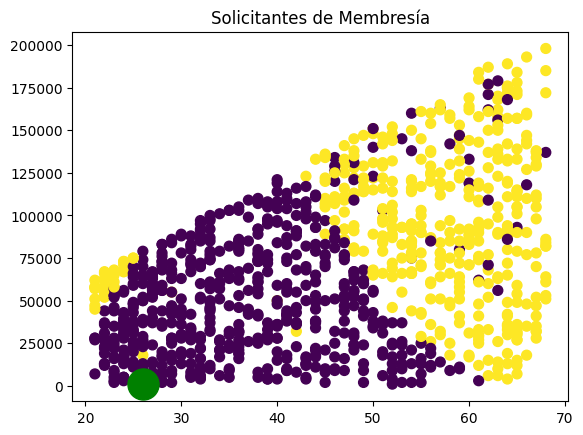

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(XD,YD)                           #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD,ydp)
print("Esta es la matriz de confusión:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spe=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spe)

#Modelo me vas a prestar o no
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("La decisión frente al pronóstico de membresía es:",ydpp)

#Las gráficas siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,0],XD[:,1],c=YD,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=500,facecolors='green')
plt.title("Solicitantes de Membresía")
plt.show()

3. Se procede con la construcción del K-Means (Montoncitos de Datos - Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


donde quedo el primer solicitante 3
donde quedo el segundo solicitante 3
donde quedo el tercer solicitante 1


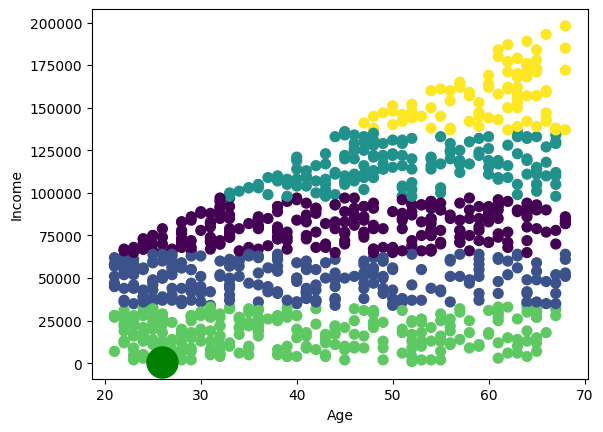

La inscripción de la persona al Fitness Center fue: [3]
El de personas que no compraron la membresía del cluster 0 es: 130
El de personas que compraron la membresía del cluster 0 es: 116
El porcentaje de personas que no compraron la mebresía del cluster 0 es; 0.5284552845528455
El porcentaje de personas que compraron la mebresía del cluster 0 es; 0.4715447154471545
El de personas que no compraron la membresía del cluster 1 es: 172
El de personas que compraron la membresía del cluster 1 es: 66
El porcentaje de personas que no compraron la mebresía del cluster 1 es; 0.7226890756302521
El porcentaje de personas que compraron la mebresía del cluster 1 es; 0.2773109243697479
El de personas que no compraron la membresía del cluster 2 es: 50
El de personas que compraron la membresía del cluster 2 es: 107
El porcentaje de personas que no compraron la mebresía del cluster 2 es; 0.3184713375796178
El porcentaje de personas que compraron la mebresía del cluster 2 es; 0.6815286624203821
El de pers

In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5,init='random', random_state=42)
mkm.fit(XD,YD)
labels=mkm.labels_

print("donde quedo el primer solicitante", labels[0,])
print("donde quedo el segundo solicitante", labels[1,])
print("donde quedo el tercer solicitante", labels[2,])

#COmo quedaron los clasificados los solicitantes
plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=500,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

#¿Donde quedó la persona específica?
XDP=np.array([[26,800,15]])
ydpp2=mkm.predict(XDP)
print("La inscripción de la persona al Fitness Center fue:",ydpp2)

#Cual es el porcentaje de personas que compraron al mebresía y los que no del cluster 0
c00=len(np.where((labels==0) & (YD==0))[0])
print("El de personas que no compraron la membresía del cluster 0 es:",c00)
c01=len(np.where((labels==0) & (YD==1))[0])
print("El de personas que compraron la membresía del cluster 0 es:",c01)
print("El porcentaje de personas que no compraron la mebresía del cluster 0 es;",c00/(c00+c01))
print("El porcentaje de personas que compraron la mebresía del cluster 0 es;",c01/(c00+c01))

#Cual es el porcentaje de personas que compraron al mebresía y los que no del cluster 1
c10=len(np.where((labels==1) & (YD==0))[0])
print("El de personas que no compraron la membresía del cluster 1 es:",c10)
c11=len(np.where((labels==1) & (YD==1))[0])
print("El de personas que compraron la membresía del cluster 1 es:",c11)
print("El porcentaje de personas que no compraron la mebresía del cluster 1 es;",c10/(c10+c11))
print("El porcentaje de personas que compraron la mebresía del cluster 1 es;",c11/(c10+c11))

#Cual es el porcentaje de personas que compraron al mebresía y los que no del cluster 2
c20=len(np.where((labels==2) & (YD==0))[0])
print("El de personas que no compraron la membresía del cluster 2 es:",c20)
c21=len(np.where((labels==2) & (YD==1))[0])
print("El de personas que compraron la membresía del cluster 2 es:",c21)
print("El porcentaje de personas que no compraron la mebresía del cluster 2 es;",c20/(c20+c21))
print("El porcentaje de personas que compraron la mebresía del cluster 2 es;",c21/(c20+c21))

#Cual es el porcentaje de personas que compraron al mebresía y los que no del cluster 3
c30=len(np.where((labels==3) & (YD==0))[0])
print("El de personas que no compraron la membresía del cluster 3 es:",c30)
c31=len(np.where((labels==3) & (YD==1))[0])
print("El de personas que compraron la membresía del cluster 3 es:",c31)
print("El porcentaje de personas que no compraron la mebresía del cluster 3 es;",c30/(c30+c31))
print("El porcentaje de personas que compraron la mebresía del cluster 3 es;",c31/(c30+c31))

#Cual es la caracteristica sociodemorgafica de cada cluster
clusters=mkm.cluster_centers_
print("Caracteristicas sociodemograficas de cada cluster:\n",clusters)

In [ ]:
#Porcentaje de Negados del cluster de mayor ingresos
pni=(13/77)*100
print("El porcentaje de los negados del cluster de mayor ingresos es de:",pni)

#Porcentaje de Aprobados del cluster de mayor ingresos
pai=(64/77)*100
print("El porcentaje de los aprobación del cluster de mayor ingresos es de:",pai)

#Porcentaje de Negados de la persona
pn=(260/309)*100
print("El porcentaje de los negados es de:",pn)

#Porcentaje de Aprobados la persona
pa=(49/309)*100
print("El porcentaje de los aprobación es de:",pa)

El porcentaje de los negados del cluster de mayor ingresos es de: 16.883116883116884
El porcentaje de los aprobación del cluster de mayor ingresos es de: 83.11688311688312
El porcentaje de los negados es de: 84.14239482200647
El porcentaje de los aprobación es de: 15.857605177993527


4. Análisis de resultados

En primer lugar, las variables que hacen parte del modelo KNN y K-Means son "Enroll", "Age", "Income" y "Hours". La variable que mejor determina el proceso de caracterización de la inscripción de una persona al Gym es "Enroll", esto lo podemos observar con los resultados que fueron dados en el análisis a priori que se realizó al comienzo y las variables que tienen una mayor correlación son "Age" y "Income".

El modelo KNN tuvo una exactitud de casi el 80%, una sensibilidad del 64% aproximadamente y una tasa de especificidad del 90% aproximadamente, esos indicadores nos permiten identificar que el modelo no es perfecto pero tiene indicadores muy buenos que nos hablan sobre su asertividad y efectividad.

Por otro lado, cuando se ejecuta el modelo KMeans, arroja que el cluster que tiene la menor edad para el modelo KMeans es el cluster 2, al igual que el 4 es el que tiene mayor número de ingresos, y el cluster 0 es el que posee la menor cantidad de dedicación de horas en el gimnasio. Basandonos en que el cluster que tiene los mayores ingresos es el 4, con un porcentaje de negados de 16.88% y un porcentaje de aprobados de 83.11%.
